### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import json
import requests
import seaborn as sns
sns.set()

### F1 API (constructors) and dataframe

In [2]:
url = f'http://ergast.com/api/f1/constructors.json?offset=0&limit=999'
response = requests.get(url).json()

constructors = response['MRData']['ConstructorTable']['Constructors']

df = pd.json_normalize(constructors)
df = df.dropna(axis=1)
df

,constructorId,url,name,nationality
0,adams,http://en.wikipedia.org/wiki/Adams_(constructor),Adams,American
1,afm,http://en.wikipedia.org/wiki/Alex_von_Falkenha...,AFM,German
2,ags,http://en.wikipedia.org/wiki/Automobiles_Gonfa...,AGS,French
3,alfa,http://en.wikipedia.org/wiki/Alfa_Romeo_in_For...,Alfa Romeo,Swiss
4,alphatauri,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri,AlphaTauri,Italian
...,...,...,...,...
206,watson,http://en.wikipedia.org/wiki/A.J._Watson,Watson,American
207,wetteroth,http://en.wikipedia.org/wiki/Wetteroth,Wetteroth,American
208,williams,http://en.wikipedia.org/wiki/Williams_Grand_Pr...,Williams,British
209,wolf,http://en.wikipedia.org/wiki/Walter_Wolf_Racing,Wolf,Canadian


### Filtering #Drivers by country

In [3]:
constructors_by_country = df['nationality'].value_counts().reset_index()

### Bar Plot

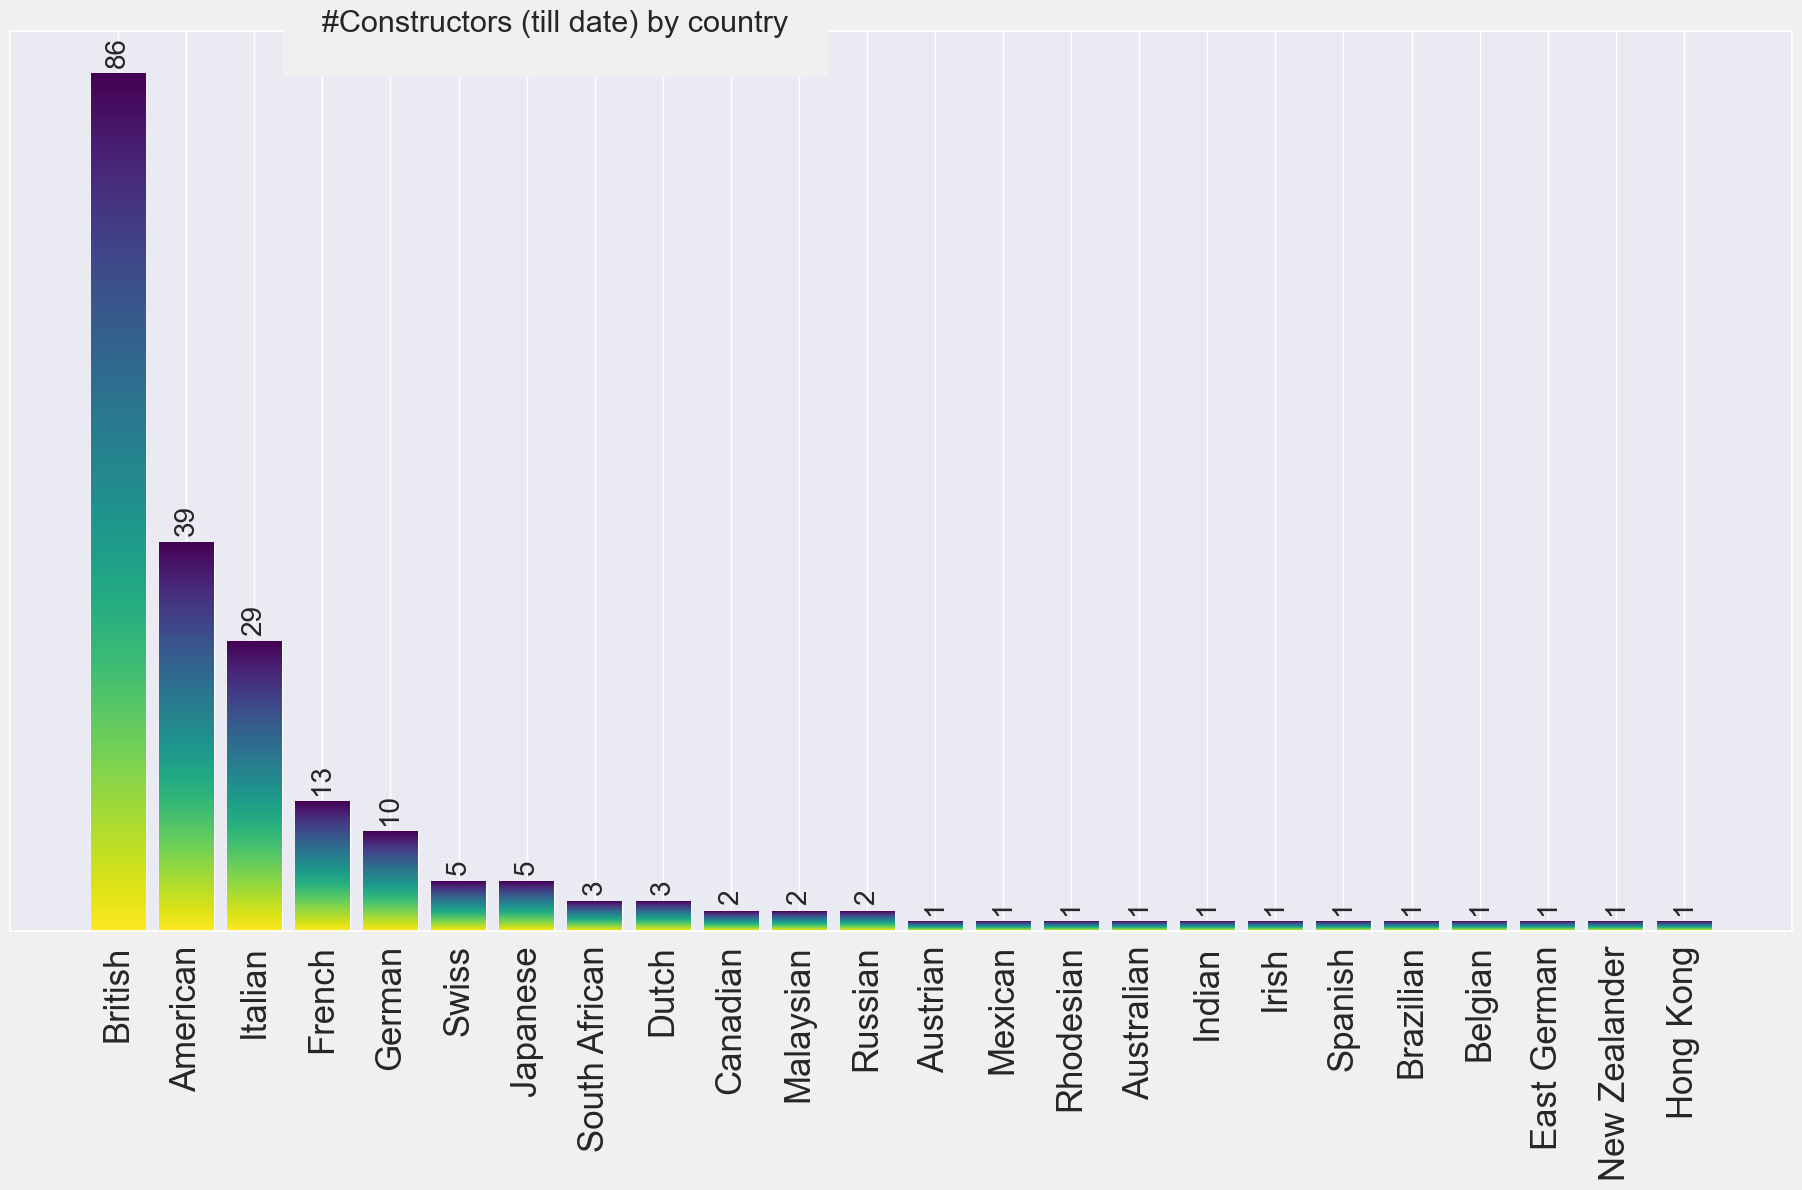

In [4]:
fig, ax = plt.subplots(figsize=(20,15), facecolor=(.94, .94, .94))

mpl.pyplot.viridis()

bar = ax.bar(constructors_by_country['nationality'], constructors_by_country['count'])
plt.tight_layout()

ax.yaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.01f}'))
title = plt.title('', pad=20, fontsize=18)
plt.subplots_adjust(top=0.8, bottom=0.2, left=0.1)

ax.grid(zorder=0)

def gradientbars(bars):
    grad = np.atleast_2d(np.linspace(0,1,256)).T
    ax = bars[0].axes
    lim = ax.get_xlim()+ax.get_ylim()
    for bar in bars:
        bar.set_zorder(1)
        bar.set_facecolor('none')
        x,y = bar.get_xy()
        w, h = bar.get_width(), bar.get_height()
        ax.imshow(grad, extent=[x,x+w,y,y+h], aspect='auto', zorder=1)
    ax.axis(lim)

gradientbars(bar)

def add_value_labels(ax, spacing=5):
    for rect in ax.patches:
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2
        space = spacing
        va = 'bottom'
        
        if y_value < 0:
            space *= -1
            va = 'top'

        label = '{:,}'.format(y_value)

        ax.annotate(
            label,                     
            (x_value, y_value),    
            xytext=(0, space),          
            textcoords='offset points', 
            ha='center',               
            va=va,rotation=90,
            fontsize=20)                    

add_value_labels(ax)      

subtitle = '#Constructors (till date) by country'
tform = ax.get_xaxis_transform()
ann = ax.annotate(subtitle,fontsize=22, xy=(3, 1), xycoords=tform, bbox=dict(boxstyle='square,pad=1.3', fc='#f0f0f0', ec='none'))

plt.xticks(np.arange(len(constructors_by_country)), constructors_by_country['nationality'], rotation=90,fontsize=25)
ax.set_yticks([])
plt.show()